<a href="https://colab.research.google.com/github/KAFE45/GitPeach-micevideolable/blob/main/power_spectrum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxdf
!pip install mne
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 41.0 MB/s eta 0:00:00


โปรดอัปโหลดไฟล์ XDF


Saving sub-testttt_ses-gfdgfdgdfgfdgfdgfdg_task-Default_run-001_eeg.xdf to sub-testttt_ses-gfdgfdgdfgfdgfdgfdg_task-Default_run-001_eeg.xdf
อัปโหลดไฟล์: sub-testttt_ses-gfdgfdgdfgfdgfdgfdg_task-Default_run-001_eeg.xdf
โปรดอัปโหลดไฟล์ XDF ที่สอง


Saving sub-testttt_ses-SSVEP10_task-Default_run-001_eeg.xdf to sub-testttt_ses-SSVEP10_task-Default_run-001_eeg.xdf
อัปโหลดไฟล์: sub-testttt_ses-SSVEP10_task-Default_run-001_eeg.xdf


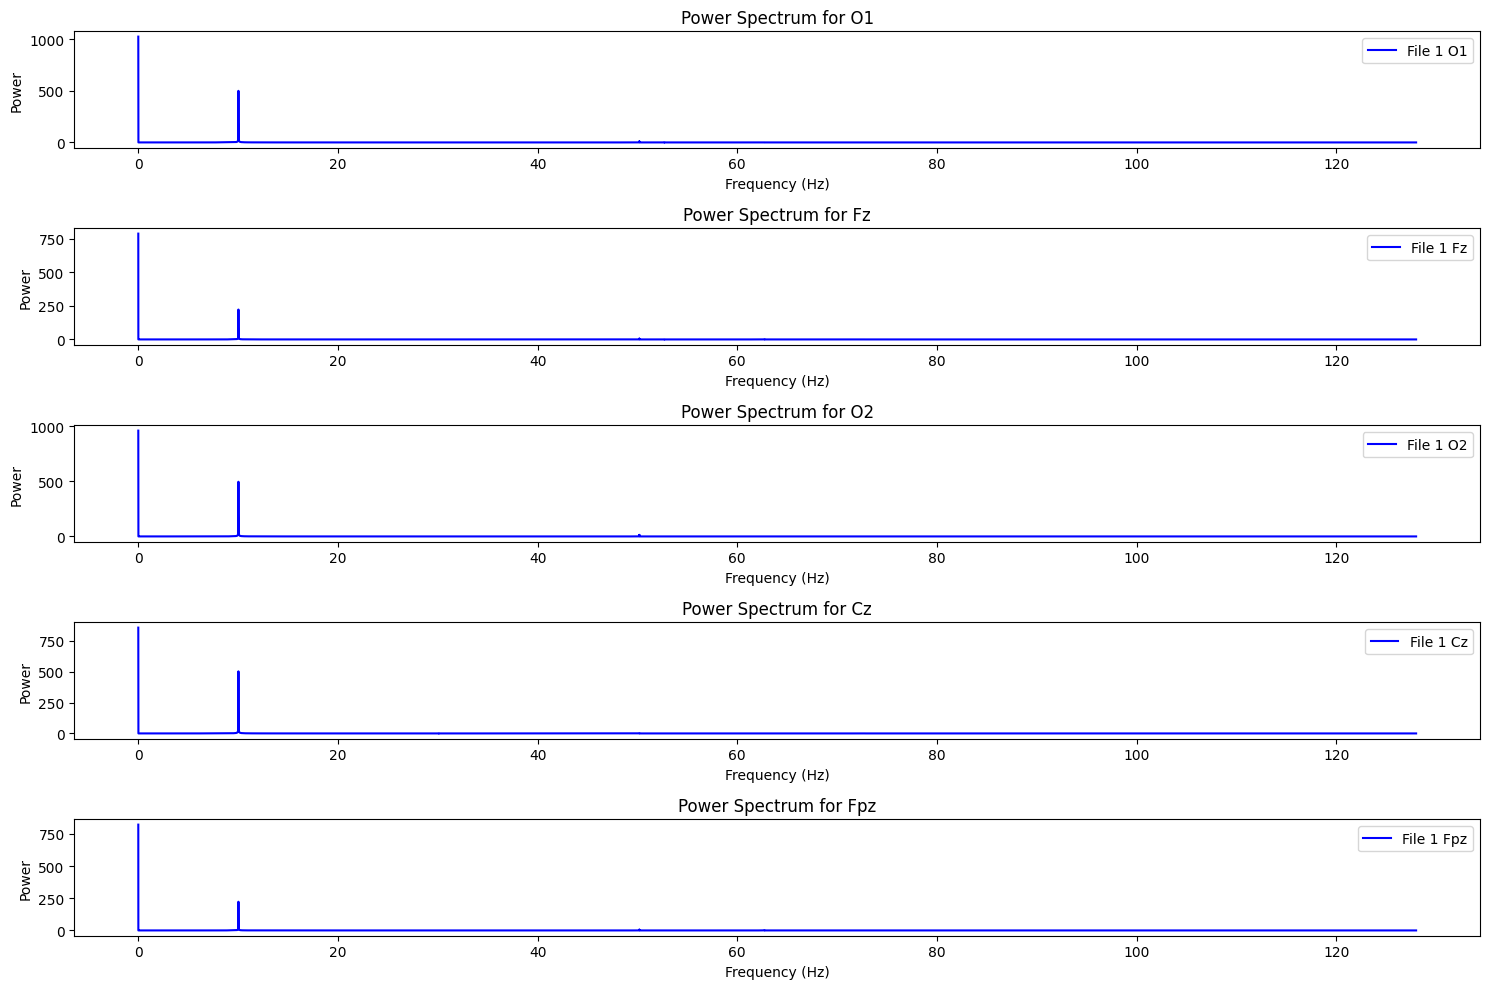

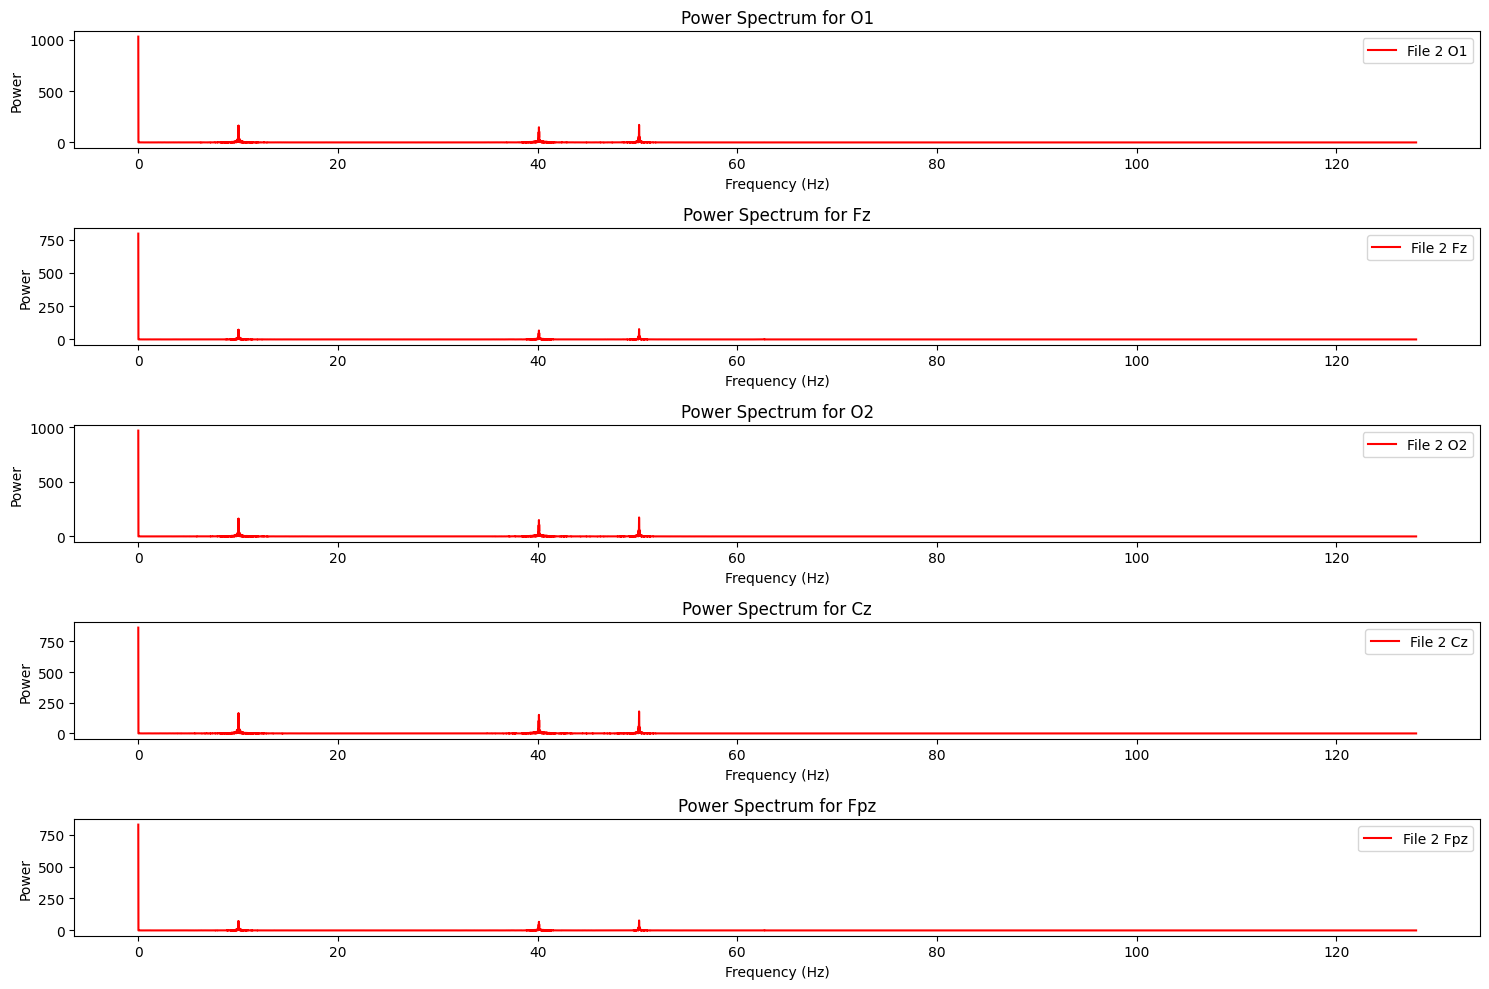

In [2]:
from google.colab import files
import pyxdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

def load_data(filepath):
    streams, header = pyxdf.load_xdf(filepath)

    # ค้นหา stream ชนิด 'signal' ที่ชื่อ 'eeg'
    eeg_stream = None
    for stream in streams:
        if stream['info']['name'][0] == 'eeg' and stream['info']['type'][0] == 'signal':
            eeg_stream = stream
            break

    if eeg_stream is None:
        raise ValueError(f"ไม่พบ stream ชื่อ 'eeg' ในไฟล์ {filepath}")

    # ดึงข้อมูลจาก stream
    data = eeg_stream['time_series']
    sampling_rate = float(eeg_stream['info']['nominal_srate'][0])
    channel_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    channel_labels = [chan['label'][0] for chan in channel_names]

    # สร้าง DataFrame
    df = pd.DataFrame(data, columns=channel_labels)

    return df, sampling_rate

def plot_power_spectrum(df, sampling_rate, channels, title_prefix, color='blue'):
    plt.figure(figsize=(15, 10))

    for i, channel in enumerate(channels):
        if channel in df.columns:
            # ดึงสัญญาณสำหรับช่องนี้
            signal = df[channel].values

            # คำนวณ FFT
            N = len(signal)
            T = 1.0 / sampling_rate
            yf = fft(signal)
            xf = np.fft.fftfreq(N, T)[:N // 2]

            # คำนวณพลังงาน
            power_spectrum = 2.0 / N * np.abs(yf[:N // 2])

            # Plot Power Spectrum
            plt.subplot(len(channels), 1, i + 1)
            plt.plot(xf, power_spectrum, color=color, label=f'{title_prefix} {channel}')
            plt.title(f'Power Spectrum for {channel}')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Power')
            plt.legend()
        else:
            print(f'Warning: {channel} not found in data columns.')

    plt.tight_layout()

# ขั้นตอนที่ 1: อัปโหลดไฟล์ XDF
print("โปรดอัปโหลดไฟล์ XDF")
uploaded = files.upload()

# เลือกไฟล์ XDF ที่อัปโหลด
xdf_file1 = list(uploaded.keys())[0]
print(f"อัปโหลดไฟล์: {xdf_file1}")

# อัปโหลดไฟล์ XDF อีกไฟล์
print("โปรดอัปโหลดไฟล์ XDF ที่สอง")
uploaded = files.upload()

xdf_file2 = list(uploaded.keys())[0]
print(f"อัปโหลดไฟล์: {xdf_file2}")

# โหลดข้อมูลจากไฟล์ทั้งสอง
df1, sampling_rate1 = load_data(xdf_file1)
df2, sampling_rate2 = load_data(xdf_file2)

# ช่องที่เราต้องการ plot
channels = ['O1', 'Fz', 'O2', 'Cz', 'Fpz']

# Plot สำหรับไฟล์แรก
plot_power_spectrum(df1, sampling_rate1, channels, 'File 1', color='blue')

# Plot สำหรับไฟล์ที่สอง
plot_power_spectrum(df2, sampling_rate2, channels, 'File 2', color='red')

plt.show()
